<a href="https://colab.research.google.com/github/ekqlsrla/TextBook/blob/main/HandsOn_MachineLearning/Chapter05_%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **핸즈온 머신러닝**

---
---

# **Chapter 05 : 서포트 벡터 머신**

---

## 5.1 선형 SVM 분류

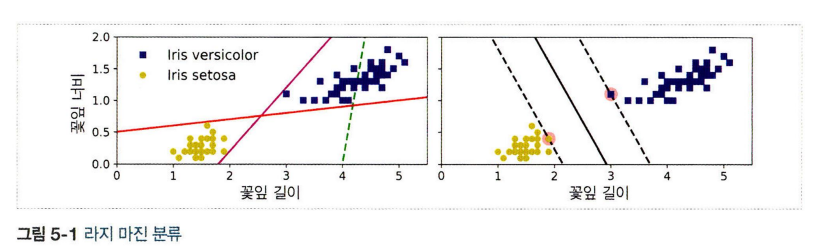

* 도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않음. 도로 경계에 위치한 샘플에 의해 전적으로 결정(또는 의지) 됨 이런 샘플을 **서포트 벡터(support vector)** 라고 함
  * 그림[5-1]의 동그라미

### 1) 소프트 마진 분류

* 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있다면 **하드마진분류**라고 함
  * 문제점 : 데이터가 선형적으로 구분될 수 있어야 제대로 작동하며, 이상치에 민감

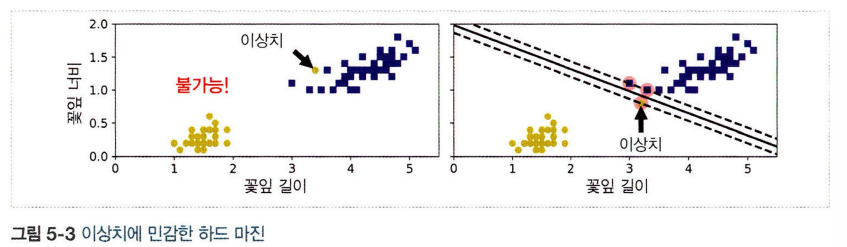

1. 왼쪽 그래프에서는 **하드 마진**을 찾을 수 없음
2. 오른쪽 그래프의 결정 경계는 이상치가 없던 [그림 5 - 1]의 결정 경계와 매우 다르고 일반화가 잘 될 것 같지 않음

`-> 이런 문제를 피하려면 좀 더 유연한 모델이 필요함. 도로의 폭을 가능한 한 넓게 유지하는 것과 마진 오류 사이에 적절한 균형을 잡아야 함 : 소프트 마진 분류`

* SVM 모델의 **하이퍼 파라미터 $C$**

1. 낮게 설정하면 왼쪽 그림과 같은 모델, 높게 설정하면 오른쪽과 같은 모델을 얻음
2. 마진 오류는 나쁘므로 일반적으로 적은 것이 좋으나 이 경우에는 왼쪽 모델에 마진 오류가 많지만 일반화가 더 잘 될 것 같음

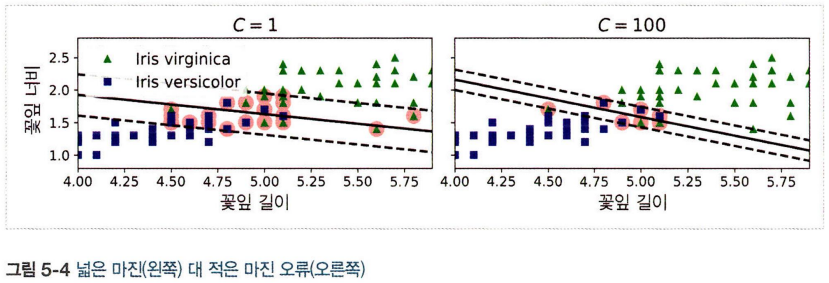

In [ ]:
#붓꽃 데이터셋을 적재하고, 특성 스케일을 변경하고 품종을 감지하기 위해 선형 SVM 모델 훈련

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))

])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5,1.7]])

array([1.])

`LinearSVC` 클래스를 대신 선형 커널을 사용하는 SVC 클래스로 대체 가능

`SVC(kernel = 'linear', C = 1)`
`SGDClassifier(loss = 'hinge', alpha = 1/(m*C))`

* `LinearSVC`는 규제에 편향을 포함시킴

**=> 훈련 세트에서 평균을 빼서 중앙에 맞춰야 함 StandardScaler를 사용하여 맞추면 자동으로 이렇게 됨. 또한, loss 매개변수를 "hinge"로 지정해야함**


---
## 5.2 비선형 SVM 분류

1. 비선형 데이터셋을 다루는 한 가지 방법은 다항 특성과 같은 특성을 더 추가하는

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C = 10, loss = 'hinge'))
])

polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

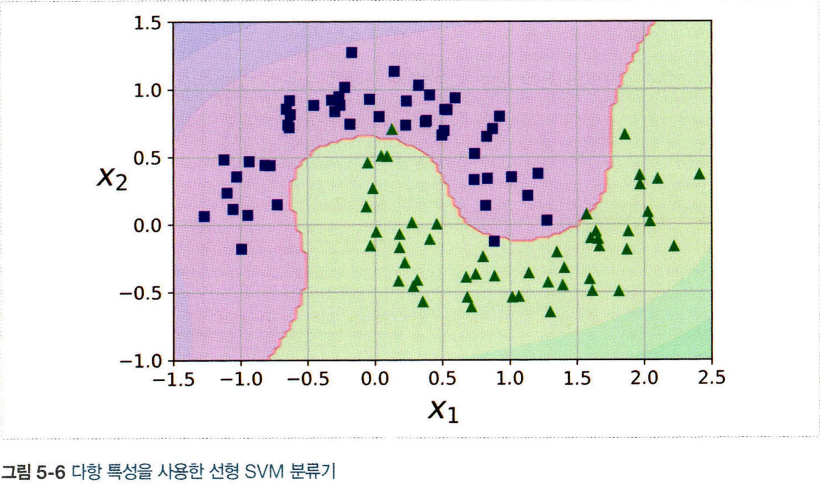

### 1) 다항식 커널

* 다항식 특성을 추가하는 것은 간단하고 모든 머신러닝 알고리즘에서 잘 작동하지만, **낮은 차수의 다항식**은 매우 복잡한 데이터셋을 잘 표현하지 못하고, 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 **느리게 만듦**

* **커널 트릭(kernel trick)**은 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있음

In [ ]:
#3차 다항식 커널을 사용해 SVM 분류기 훈련
#모델이 과대적합이라면 다항식의 차수를 줄여야 하며, 과소적합이라면 차수를 늘려야 함
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### 2) 유사도 특성

: 각 샘플이 특정 **랜드마크**와 얼마나 닮았는지 측정하는 유사도 함수를 계산한 특성을 추가하는 것

1. 장점 : 차원이 매우 커지고, 변환된 훈련 세트가 선형적으로 구분될 가능성이 높음
2. 단점 : 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환된다는

### 3) 가우시안 RBF 커널



In [ ]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

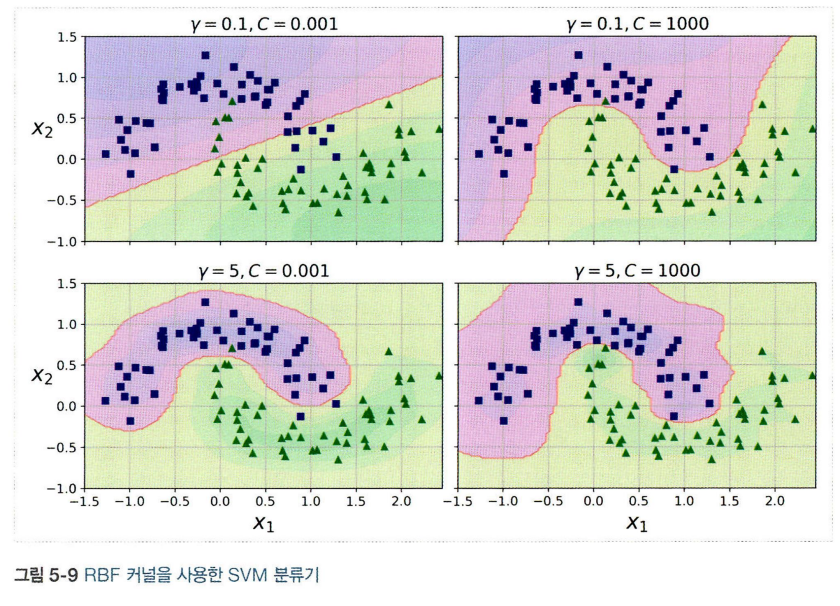

* **gamma**를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 **영향 범위가 작아짐**

* **gamma**가 작아지면 넓은 종 모양 그래프를 만들며 샘플이 **넓은 범위**에 걸쳐 영향을 주므로 결정 경계가 더 부드러워짐

=> 모델이 과대적합일 경우엔 감소시켜야 하고, 과소적합일 경우엔 증가시켜야 함

### 4) 계산 복잡도

* 정밀도를 **높이면** 알고리즘의 수행 시간이 **길어짐**

* SVM 분류를 위한 사이킷런 파이썬 클래스 비교

|파이썬 클래스|시간복잡도|스케일 조정|커널 트릭|
|---|-----|---|---|
|LinearSVC|$O(m*n)$|O|X|
|SGDClassifier|$O(m*n)$|O|X|
|SVC|$O(m^2 \times n)-O(m^3 \times n)$|O|O|

---

## 5.3 SVM 회귀

* SVM을 분류가 아니라 회귀에 적용하는 방법은 목표를 반대로 하는 것. 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, 제한된 마진 오류 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습

In [6]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [7]:
#커널 트릭을 제공하는 사이킷런의 SVR을 사용

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

---
## 5.4 SVM 이론

### 1) 결정 함수와 예측

* 선형 SVM 분류기 모델은 단순히 결정함수를 계산해서 새로운 샘플의 클래스를 예측하며, 결괏값이 0보다 크면 예측된 클래스는 양성 클래스가 됨

* 선형 SVM 분류기를 훈련한다는 것은 마진 오류를 **하나도 발생하지 않거나** **제한적인** 마진 오류를 가지면서 가능한 한 마진을 크게하는 $w$와 $b$를 찾는 것

### 2) 목적 함수

* 결정 함수의 기울기를 생각해보면 이는 가중치 벡터의 노름 $||w||$와 같음. 가중치 벡터가 작을수록 마진은 커짐